Exploratory data analysis of the California housing market dataset. The steps for the analysis include:

1) Data downloading and loading

2) Inspection: Data types, Empty, Duplicates

3) Cleaning: Imputation

4) Feature distribution visualiation, feature engineering (one-hot encoding, new features), correlation analysis


Author: Argy Christodoulidis




Section 1. Data downloading and loading

In [1]:
#Module loading to be able to perform the analysis

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/home/argy/anaconda3/envs/Pfizer_assignment_ML_DS/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("camnugent/california-housing-prices")
data = pd.read_csv(path+'/housing.csv')

In [3]:
data.shape

(20640, 10)

Section 2. Inspection: Data types, Empty, Duplicates

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
print(data.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [6]:
data['ocean_proximity'].value_counts() 

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
#Check specifically the categorical column because it needs different handling in case of NaNs
data['ocean_proximity'].hasnans

False

In [8]:
data.duplicated().any()

np.False_

In [9]:
data.isnull().any().any()

np.True_

Section 3. Cleaning: Imputation

In [10]:
#Imputation of the empty values with the median of the feature
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column].fillna(data[column].median(), inplace=True)

/tmp/ipykernel_147323/341921771.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
/tmp/ipykernel_147323/341921771.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [11]:
data.isnull().any().any()

np.False_

Section 4. Feature distribution visualization, correlation analysis, feature engineering

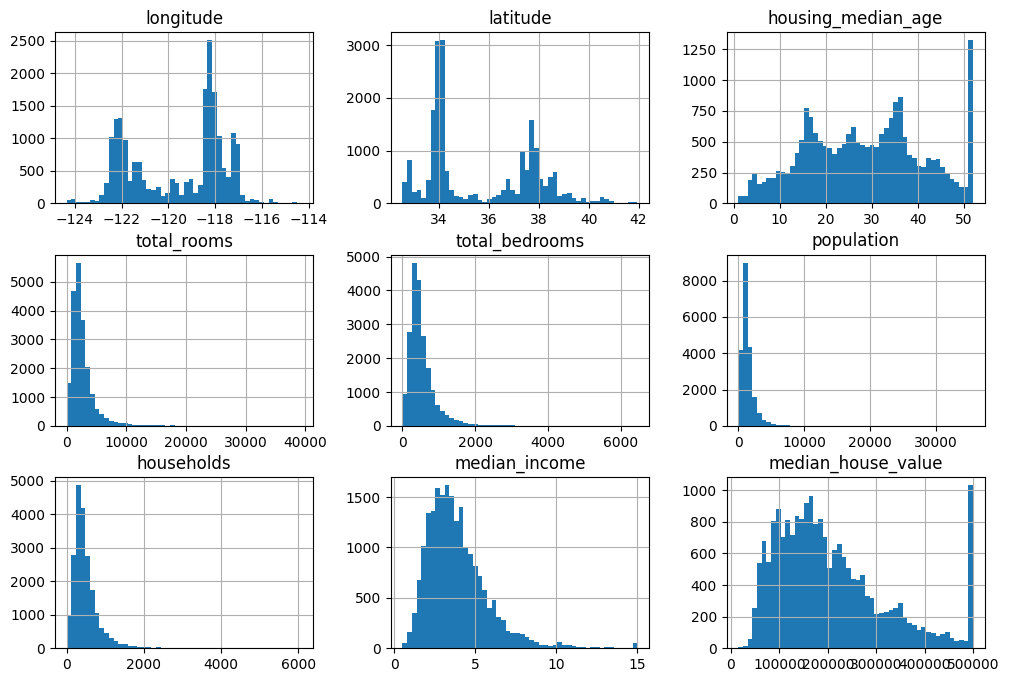

In [12]:
data.hist(bins=50, figsize=(12,8))
plt.show()

In [13]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='longitude', ylabel='latitude'>

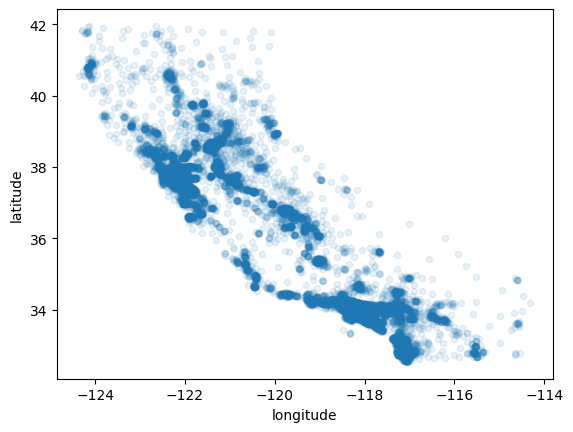

In [14]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

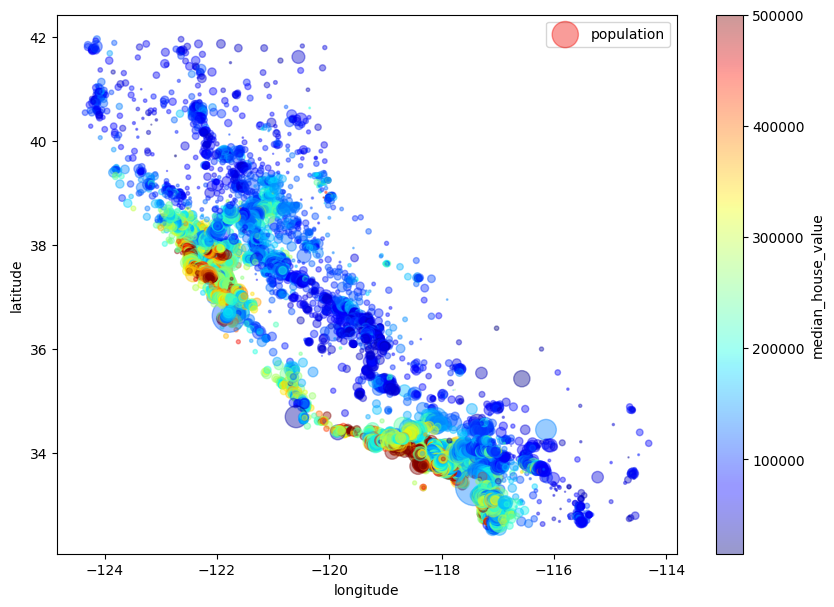

In [15]:
#A scatter plot of measurements per longitude and latidute of data points (rows) with the radius of 
# every data point set propotionally to the district population (divided by 50), and
# the colormap set by the median house value in the district

data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/50, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [16]:
#One-hot encoding of the categorical column:

data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Find the one-hot encoded columns (dummy columns) by name pattern
dummy_columns = [col for col in data.columns if 'ocean_proximity' in col]

# Convert only these dummy columns to integers
data[dummy_columns] = data[dummy_columns].astype(int)

In [17]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [18]:
#New features
first_ocean_proximity_col = [col for col in data.columns if col.startswith('ocean_proximity')][0]
insertion_index = data.columns.get_loc(first_ocean_proximity_col)

# Step: Calculate new features and insert them at the identified position
data.insert(insertion_index, 'population_density', data['population'] / data['households'])
data.insert(insertion_index + 1, 'bedrooms_per_room', data['total_bedrooms'] / data['total_rooms'])
data.insert(insertion_index + 2, 'rooms_per_household', data['total_rooms'] / data['households'])


In [19]:
correlations = data.iloc[:,:-4].corr()
correlations["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688075
rooms_per_household    0.151948
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049457
population_density    -0.023737
population            -0.024650
longitude             -0.045967
latitude              -0.144160
bedrooms_per_room     -0.233303
Name: median_house_value, dtype: float64

(array([2247., 7436., 6098., 2990., 1060.,  428.,  178.,   93.,   47.,
          63.]),
 array([ 0.4999 ,  1.94992,  3.39994,  4.84996,  6.29998,  7.75   ,
         9.20002, 10.65004, 12.10006, 13.55008, 15.0001 ]),
 <BarContainer object of 10 artists>)

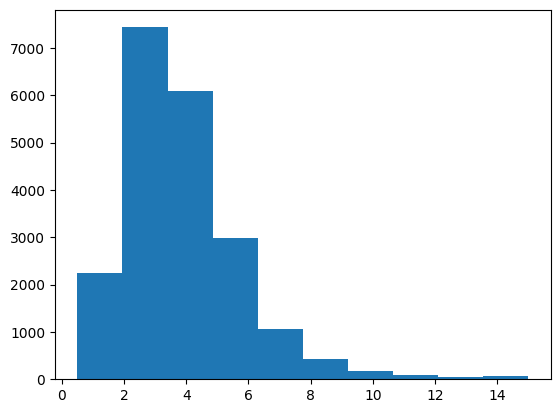

In [20]:
plt.hist(data["median_income"])

In [21]:
data.insert(insertion_index + 3, 'income_categories', np.ceil(data["median_income"] / 1.5))
data['income_categories'].where(data['income_categories'] < 5, 5.0, inplace=True)

/tmp/ipykernel_147323/1052257547.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['income_categories'].where(data['income_categories'] < 5, 5.0, inplace=True)


(array([ 822.,    0., 6581.,    0.,    0., 7236.,    0., 3639.,    0.,
        2362.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

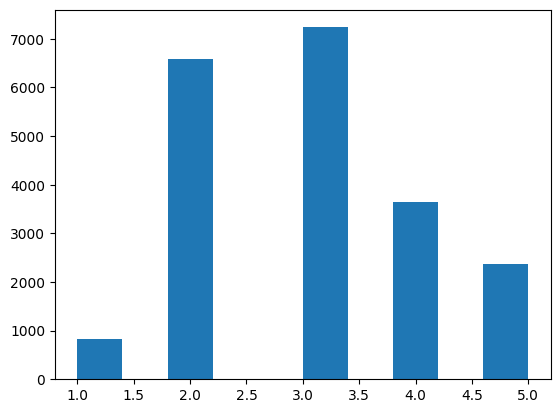

In [22]:
plt.hist(data['income_categories'])